In [1]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import os
import numpy as np
import os, time
import Custom_Envs
import os, time

In [2]:
# relative act and rw
model_parameter = "PPO_Sat Mar  9 15:58:19 2024"
base_path = "../results_4/RL_MFD_normal/"+str(model_parameter)+"/eval/env_0/" 


toll_arr_0 = np.load(file=(base_path+"ppo_toll.npy"))
tt_arr_0 = np.load(file=(base_path+"ppo_tt.npy"))
# tt_car_arr_0 = np.load(file=(base_path+"ppo_AITT_car_only_ls.npy"))

action_arr_0 = np.load(file=(base_path+"ppo_action.npy"))
mp_arr_0 = np.load(file=(base_path+"ppo_mp.npy"))

sw_arr_0 = np.load(file=(base_path+"ppo_sw.npy"))
pt_arr_0 = np.load(file=(base_path+"ppo_pt.npy"))

# sde_util_arr_0 = np.load(file=(base_path+"/sde_util_ls.npy"))
# sdl_util_arr_0 = np.load(file=(base_path+"/sdl_util_ls.npy"))
# userBuy_util_arr_0 = np.load(file=(base_path+"/userBuy_util_ls.npy"))
# userSell_util_arr_0 = np.load(file=(base_path+"/userSell_util_ls.npy"))
# ptwaiting_util_arr_0 = np.load(file=(base_path+"/ptwaiting_util_ls.npy"))
# tt_util_arr_0 = np.load(file=(base_path+"/tt_util_ls.npy"))

plot_path = "../Plot/RL_MFD_normal/fftt_rw/eval/"
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [3]:
action_arr_0.shape

(90, 1, 60, 1)

In [4]:
action_arr_0[-1]

array([[[ 0.32795626],
        [ 0.43082076],
        [ 0.5629417 ],
        [ 0.66774   ],
        [ 0.44448107],
        [ 0.06272679],
        [-0.11268605],
        [ 0.05302453],
        [-0.12054218],
        [ 0.10250293],
        [-0.11485124],
        [ 0.06423365],
        [-0.16979763],
        [-0.12048749],
        [-0.17945528],
        [-0.15643096],
        [ 0.33198375],
        [-0.26667932],
        [ 0.16865456],
        [ 0.17467615],
        [-0.28170446],
        [ 0.04082893],
        [ 0.05807474],
        [ 0.16857374],
        [-0.2022655 ],
        [-0.00933636],
        [ 0.13164982],
        [-0.04357193],
        [ 0.01529988],
        [ 0.06413104],
        [-0.20180014],
        [-0.00546455],
        [ 0.23004034],
        [-0.20890367],
        [ 0.03432325],
        [-0.0767963 ],
        [ 0.35564932],
        [-0.23270828],
        [-0.07040713],
        [ 0.20896417],
        [-0.1493862 ],
        [ 0.12595344],
        [-0.2038329 ],
        [-0

/tmp/ipykernel_560712/3871422420.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


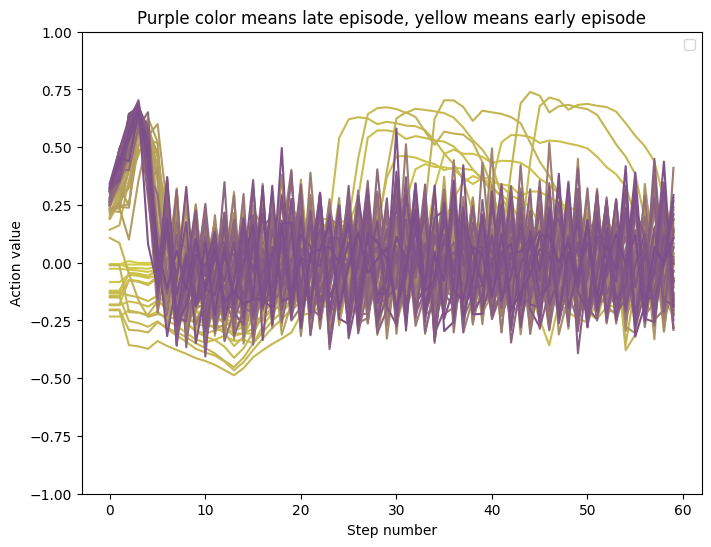

In [5]:

x = range(action_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = action_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(n):
    y =action_arr_0[i, 0, :, 0]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("Action value", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
plt.ylim(-1, 1)
plt.legend()
fig.savefig(plot_path+'/evaluation_A_value.jpeg', dpi=fig.dpi)

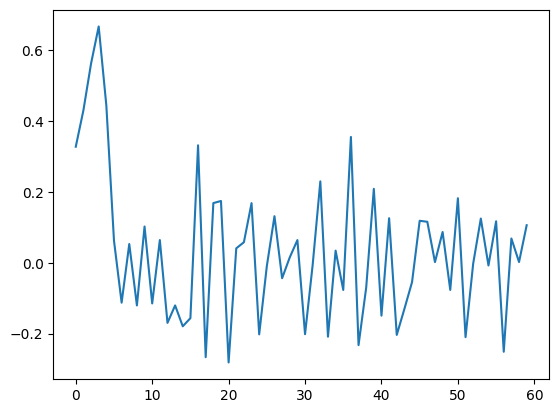

In [6]:
plt.plot(action_arr_0[-1, 0, :, 0])

In [7]:
np.round(toll_arr_0[-1, 0, : , 0], 2)

array([0.  , 0.66, 1.52, 2.64, 3.98, 4.87, 4.99, 4.77, 4.87, 4.63, 4.84,
       4.61, 4.74, 4.4 , 4.16, 3.8 , 3.48, 4.15, 3.61, 3.95, 4.3 , 3.74,
       3.82, 3.94, 4.27, 3.87, 3.85, 4.11, 4.03, 4.06, 4.18, 3.78, 3.77,
       4.23, 3.81, 3.88, 3.73, 4.44, 3.97, 3.83, 4.25, 3.95, 4.2 , 3.8 ,
       3.54, 3.43, 3.66, 3.9 , 3.9 , 4.07, 3.92, 4.28, 3.86, 3.86, 4.11,
       4.09, 4.33, 3.83, 3.96, 3.97, 4.18])

Text(0.5, 0, 'Step number')

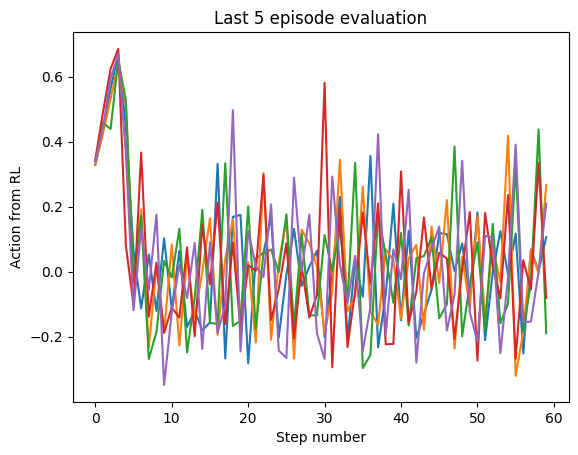

In [8]:
plt.plot(action_arr_0[-1, 0, :, 0])
plt.plot(action_arr_0[-2, 0, :, 0])
plt.plot(action_arr_0[-3, 0, :, 0])
plt.plot(action_arr_0[-4, 0, :, 0])
plt.plot(action_arr_0[-5, 0, :, 0])
plt.ylabel("Action from RL", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

Text(0.5, 0, 'Step number')

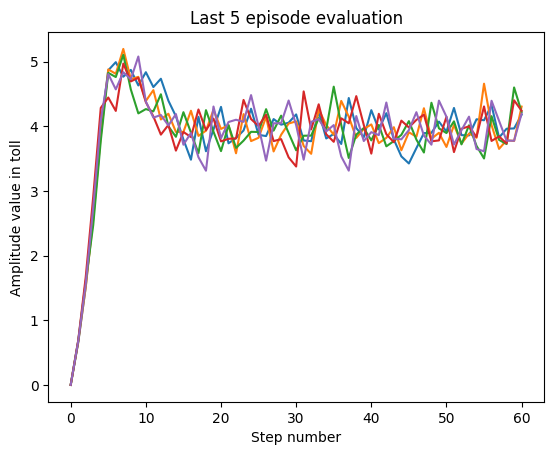

In [9]:
plt.plot(toll_arr_0[-1, 0, :, 0])
plt.plot(toll_arr_0[-2, 0, :, 0])
plt.plot(toll_arr_0[-3, 0, :, 0])
plt.plot(toll_arr_0[-4, 0, :, 0])
plt.plot(toll_arr_0[-5, 0, :, 0])
plt.ylabel("Amplitude value in toll", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

In [10]:
pt_arr_0[-79]

array([[   0,    0,   41,   44,   46,   48,   51,   56,   64,   69,   79,
          91,  111,  156,  287,  478,  607,  683,  729,  772,  809,  815,
         828,  828,  838,  840,  834,  837,  897,  962, 1050, 1143, 1134,
        1141, 1143, 1146, 1187, 1250, 1307, 1359, 1424, 1478, 1538, 1612,
        1664, 1642, 1587, 1544, 1456, 1431, 1367, 1263, 1135, 1095, 1190,
        1097,  966, 1046, 1077, 1079, 1131]])

In [11]:
[-80]

[-80]

Text(0.5, 0, 'Step number')

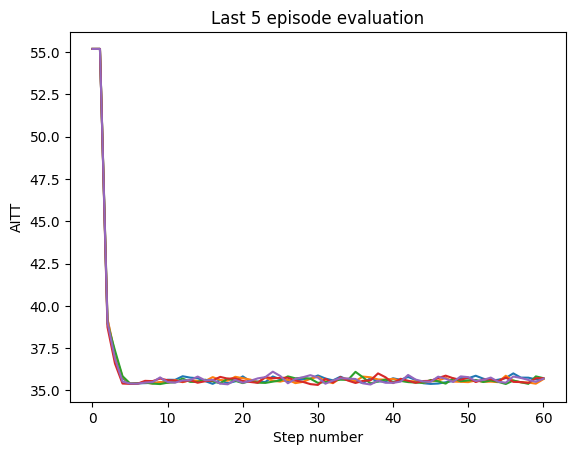

In [12]:
plt.plot(tt_arr_0[-1, 0, :])
plt.plot(tt_arr_0[-2, 0, :])
plt.plot(tt_arr_0[-3, 0, :])
plt.plot(tt_arr_0[-4, 0, :])
plt.plot(tt_arr_0[-5, 0, :])
plt.ylabel("AITT", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

Text(0.5, 0, 'Step number')

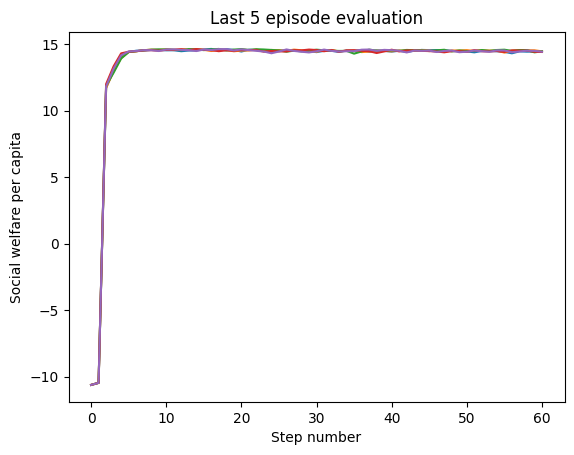

In [13]:
plt.plot(sw_arr_0[-1, 0, :]/7500)
plt.plot(sw_arr_0[-2, 0, :]/7500)
plt.plot(sw_arr_0[-3, 0, :]/7500)
plt.plot(sw_arr_0[-4, 0, :]/7500)
plt.plot(sw_arr_0[-5, 0, :]/7500)
plt.ylabel("Social welfare per capita", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

Text(0.5, 0, 'Step number')

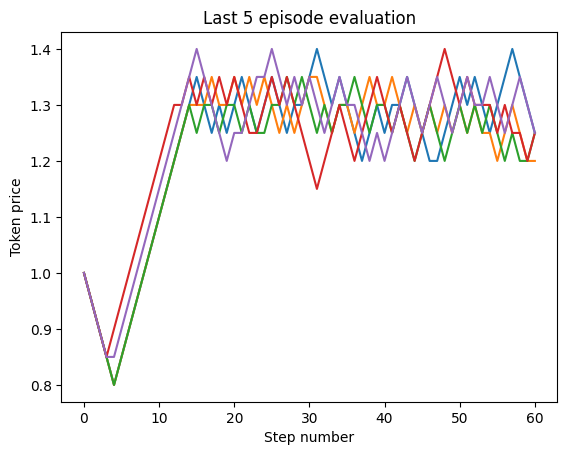

In [14]:
plt.plot(mp_arr_0[-1, 0, :])
plt.plot(mp_arr_0[-2, 0, :])
plt.plot(mp_arr_0[-3, 0, :])
plt.plot(mp_arr_0[-4, 0, :])
plt.plot(mp_arr_0[-5, 0, :])
plt.ylabel("Token price", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

In [15]:
pt_arr_0[-1, 0, :]

array([   0,    0,  140,  249,  439,  666,  765,  777,  862,  862,  999,
        998, 1104, 1073, 1051,  963,  799,  970,  839,  901, 1088,  957,
        938,  920, 1084, 1017,  947,  973, 1005, 1019, 1109, 1037,  981,
       1069,  997,  960,  841, 1033,  937,  939, 1029,  998, 1065,  995,
        827,  761,  772,  842,  903, 1036, 1035, 1094, 1028,  961,  985,
       1036, 1168, 1057, 1056, 1009, 1017])

Text(0.5, 0, 'Step number')

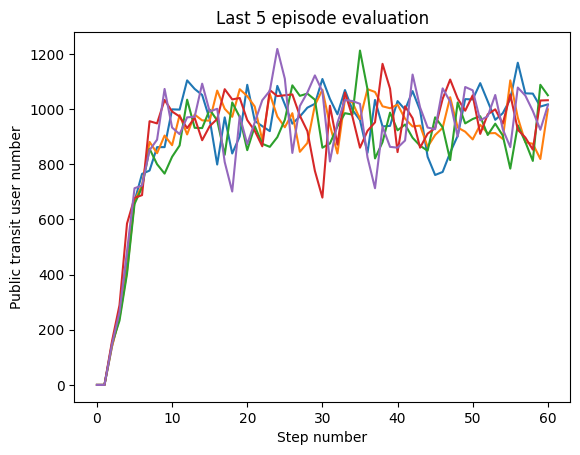

In [16]:
plt.plot(pt_arr_0[-1, 0, :])
plt.plot(pt_arr_0[-2, 0, :])
plt.plot(pt_arr_0[-3, 0, :])
plt.plot(pt_arr_0[-4, 0, :])
plt.plot(pt_arr_0[-5, 0, :])
plt.ylabel("Public transit user number", fontsize = 10)
plt.title("Last 5 episode evaluation")
plt.xlabel("Step number", fontsize = 10)

/tmp/ipykernel_560712/2994701248.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


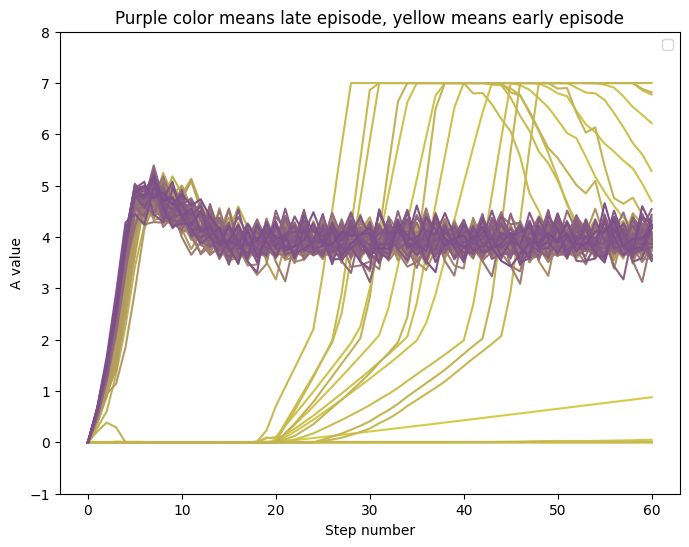

In [17]:

x = range(toll_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = toll_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(n):
    y =toll_arr_0[i, 0, :, 0]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("A value", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
plt.ylim(-1, 8)
plt.legend()
fig.savefig(plot_path+'/evaluation_A_value.jpeg', dpi=fig.dpi)

In [18]:
toll_arr_0.shape

(90, 1, 61, 3)

In [19]:
np.round(toll_arr_0[-1, 0, : , 0 ],2 )

array([0.  , 0.66, 1.52, 2.64, 3.98, 4.87, 4.99, 4.77, 4.87, 4.63, 4.84,
       4.61, 4.74, 4.4 , 4.16, 3.8 , 3.48, 4.15, 3.61, 3.95, 4.3 , 3.74,
       3.82, 3.94, 4.27, 3.87, 3.85, 4.11, 4.03, 4.06, 4.18, 3.78, 3.77,
       4.23, 3.81, 3.88, 3.73, 4.44, 3.97, 3.83, 4.25, 3.95, 4.2 , 3.8 ,
       3.54, 3.43, 3.66, 3.9 , 3.9 , 4.07, 3.92, 4.28, 3.86, 3.86, 4.11,
       4.09, 4.33, 3.83, 3.96, 3.97, 4.18])

/tmp/ipykernel_560712/2076113916.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


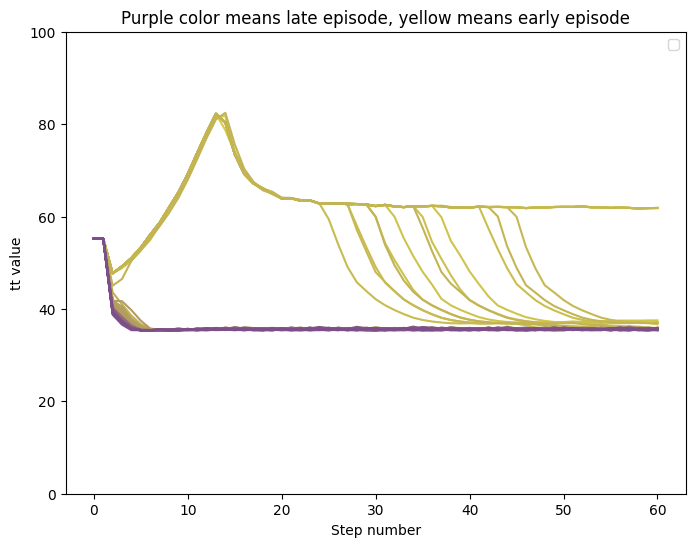

In [20]:

x = range(tt_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = tt_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(n):
    y =tt_arr_0[i, 0, :]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("tt value", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
plt.ylim(0, 100)
plt.legend()
fig.savefig(plot_path+'/evaluation_aitt.jpeg', dpi=fig.dpi)

In [21]:
print("Average AITT in 60 days: ", np.round(np.mean(tt_arr_0[-1, 0, : ]),2 ))
print("Average AITT in last 5 days: ",  np.round(np.mean(tt_arr_0[-1, 0, -5:]),2))
car_only = (np.mean(tt_arr_0[-1, 0, -5:]) * 7500 - np.mean(pt_arr_0[-1, 0, -5:])*60)/(7500 -  np.mean(pt_arr_0[-1, 0, -5:]))
print("Car only average AITT in last 5 days: ", np.round(car_only, 2))
print("Average PT user number in last 5 days: ", np.round(np.mean(pt_arr_0[-1, 0, -5:]),2 ))
print("Average social welfare per capita in last 5 days: ", np.round(np.mean(sw_arr_0[-1, 0, -5:]/7500),2))
print("Average token price in last 5 days: ", np.round(np.mean(mp_arr_0[-1, 0, -5:]),2 ))


Average AITT in 60 days:  36.34
Average AITT in last 5 days:  35.77
Car only average AITT in last 5 days:  31.77
Average PT user number in last 5 days:  1061.4
Average social welfare per capita in last 5 days:  14.42
Average token price in last 5 days:  1.33


/tmp/ipykernel_560712/2780758951.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


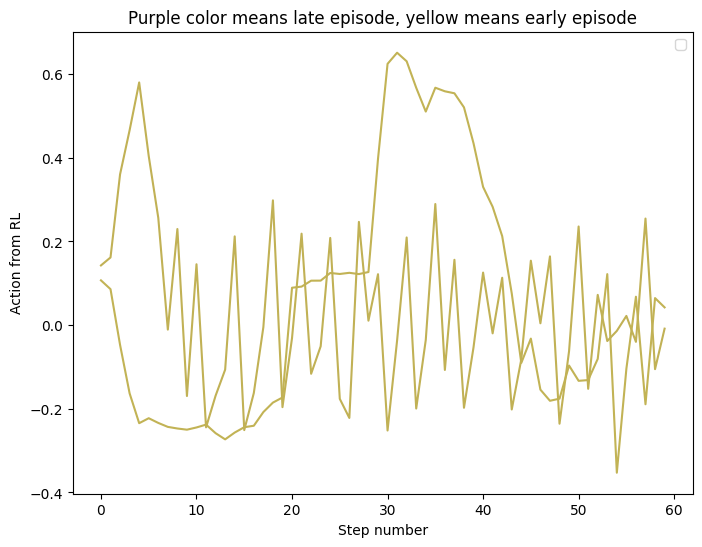

In [22]:

x = range(action_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = action_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(18, 20):
    y =action_arr_0[i, 0, :, 0]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("Action from RL", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
# plt.ylim(-1, 7)
plt.legend()
fig.savefig(plot_path+'/evaluation_RL_action.jpeg', dpi=fig.dpi)

/tmp/ipykernel_560712/1197871001.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


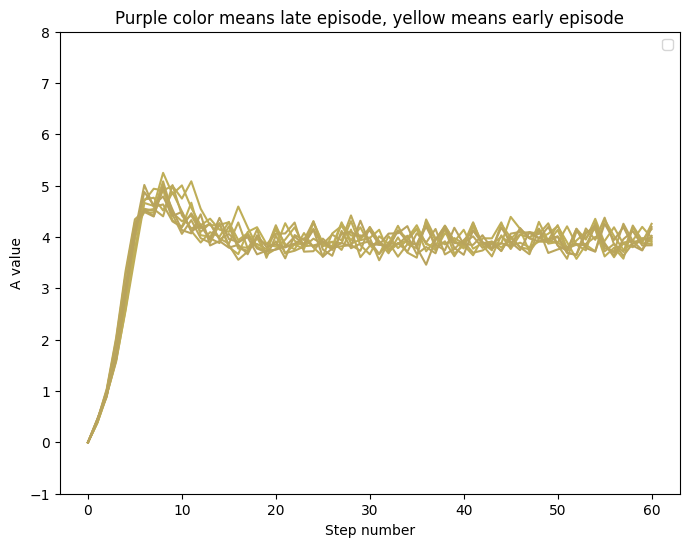

In [23]:

x = range(toll_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = toll_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(20, 30):
    y =toll_arr_0[i, 0, :, 0]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("A value", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
plt.ylim(-1, 8)
plt.legend()
fig.savefig(plot_path+'/evaluation_A_value.jpeg', dpi=fig.dpi)

/tmp/ipykernel_560712/3033033196.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


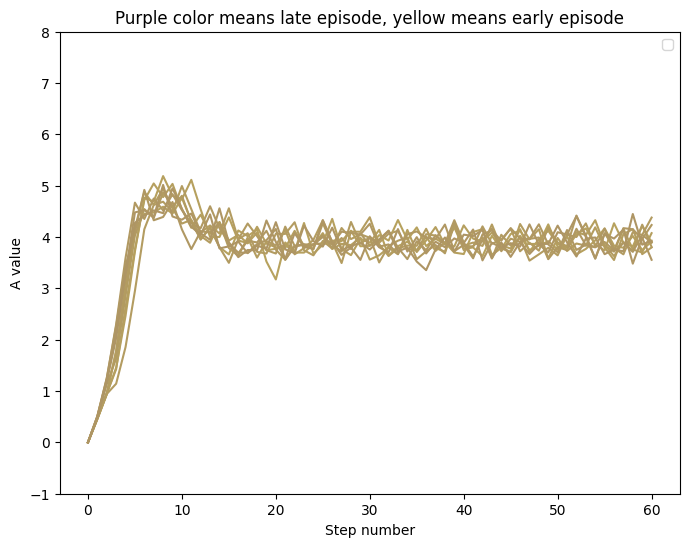

In [24]:

x = range(toll_arr_0.shape[2])
def colorFader(c1, c2, mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# the yellow the early episode, the purple the late episode
c1 = '#D4CC47' #yellow
c2 = '#7C4D8B' #purple

n = toll_arr_0.shape[0] # evaluation time
fig, ax = plt.subplots(figsize=(8,6))
y_ls = []

for i in range(30,40):
    y =toll_arr_0[i, 0, :, 0]
    plt.plot(x, y, 'k-', color=colorFader(c1,c2,i/n))
plt.ylabel("A value", fontsize = 10)
plt.title("Purple color means late episode, yellow means early episode")
plt.xlabel("Step number", fontsize = 10)
plt.ylim(-1, 8)
plt.legend()
fig.savefig(plot_path+'/evaluation_A_value.jpeg', dpi=fig.dpi)

In [25]:
np.sum(tt_arr_0/-24)

-9294.167731834996

In [26]:
np.sum(tt_arr_0/-24, axis=2)

array([[-159.56162518],
       [-159.6787642 ],
       [-159.70010145],
       [-159.70010145],
       [-159.70010145],
       [-138.66151488],
       [-133.3141197 ],
       [-130.72571398],
       [-136.32782639],
       [-159.70010145],
       [-143.20466217],
       [-127.92250221],
       [-124.58767148],
       [-127.82855648],
       [-146.44334354],
       [-159.70010145],
       [-144.36841123],
       [-135.52209404],
       [-129.98242285],
       [ -93.03309354],
       [ -92.53782252],
       [ -92.71016103],
       [ -92.64882402],
       [ -92.57596828],
       [ -92.44739726],
       [ -92.43908007],
       [ -92.44681335],
       [ -92.47372777],
       [ -92.466106  ],
       [ -92.57050053],
       [ -92.46420727],
       [ -92.53632983],
       [ -92.55194872],
       [ -92.47891394],
       [ -92.84448897],
       [ -92.45530966],
       [ -92.30127816],
       [ -92.3328692 ],
       [ -92.33676179],
       [ -92.27823763],
       [ -92.31566579],
       [ -92.204

In [27]:
print("Average AITT in 60 days: ", np.round(np.mean(tt_arr_0[-1, 0, : ]),2 ))
print("Average AITT in last 5 days: ",  np.round(np.mean(tt_arr_0[-1, 0, -5:]),2))
car_only = (np.mean(tt_arr_0[-1, 0, -5:]) * 7500 - np.mean(pt_arr_0[-1, 0, -5:])*60)/(7500 -  np.mean(pt_arr_0[-1, 0, -5:]))
print("Car only average AITT in last 5 days: ", np.round(car_only, 2))
print("Average PT user number in last 5 days: ", np.round(np.mean(pt_arr_0[-1, 0, -5:]),2 ))
print("Average social welfare per capita in last 5 days: ", np.round(np.mean(sw_arr_0[-1, 0, -5:]/7500),2))
print("Average token price in last 5 days: ", np.round(np.mean(mp_arr_0[-1, 0, -5:]),2 ))


Average AITT in 60 days:  36.34
Average AITT in last 5 days:  35.77
Car only average AITT in last 5 days:  31.77
Average PT user number in last 5 days:  1061.4
Average social welfare per capita in last 5 days:  14.42
Average token price in last 5 days:  1.33


In [28]:
tt_arr_0.shape

(90, 1, 61)

ValueError: x and y can be no greater than 2D, but have shapes (90,) and (90, 1, 61)

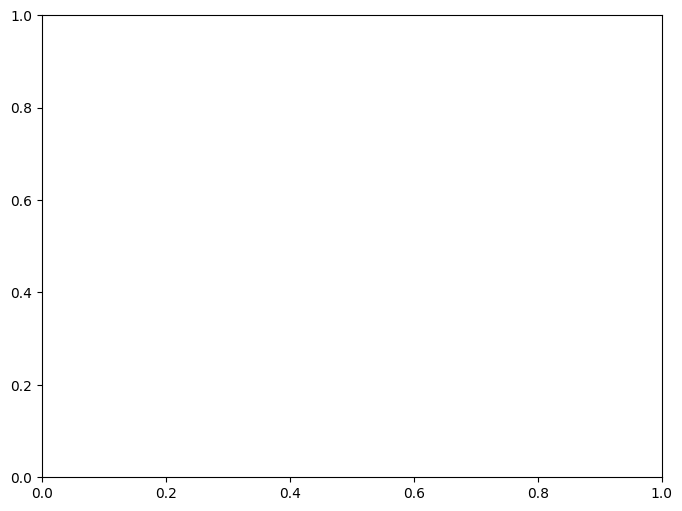

In [29]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(tt_arr_0)
plt.ylabel("Average individual travel time",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_AITT.jpeg', dpi=fig.dpi)


ValueError: x and y can be no greater than 2D, but have shapes (170,) and (170, 1, 61)

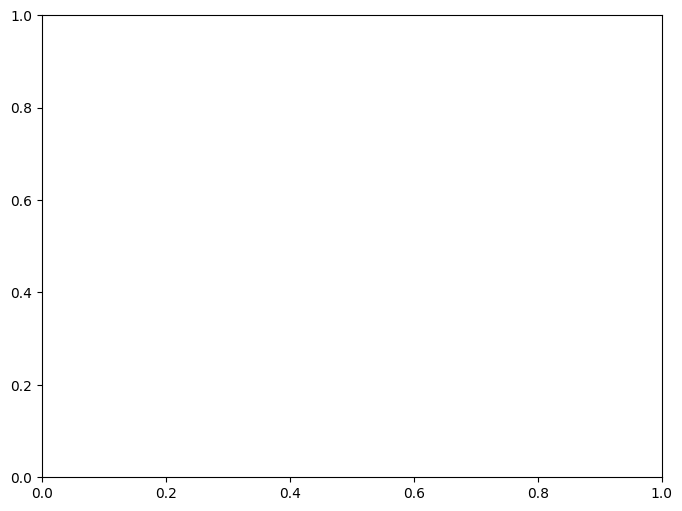

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(sw_arr_0/7500)
plt.ylabel("Social welfare per capita",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_sw.jpeg', dpi=fig.dpi)


ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1, 61)

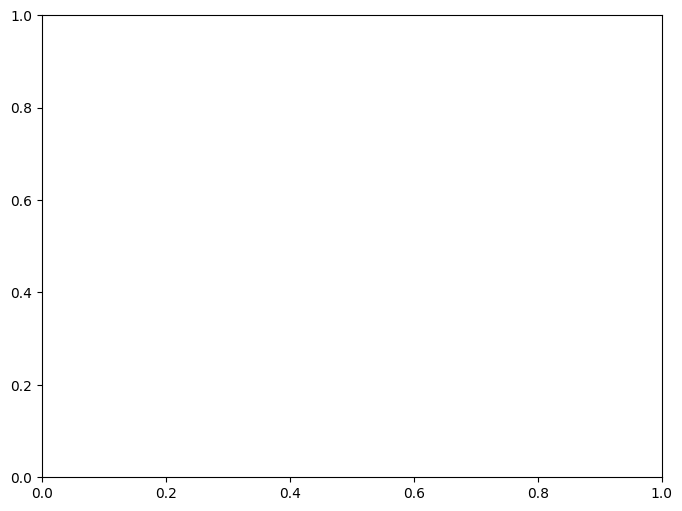

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(mp_arr_0)
plt.ylabel("Market price",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_mp.jpeg', dpi=fig.dpi)


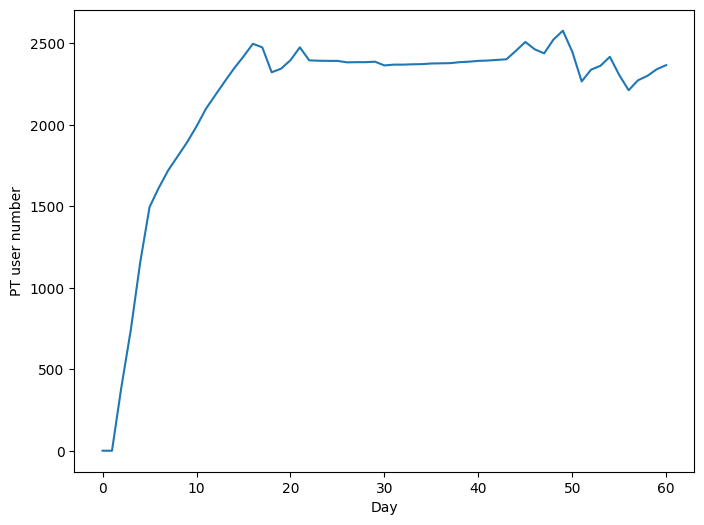

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(pt_arr_0)
plt.ylabel("PT user number",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_pt.jpeg', dpi=fig.dpi)


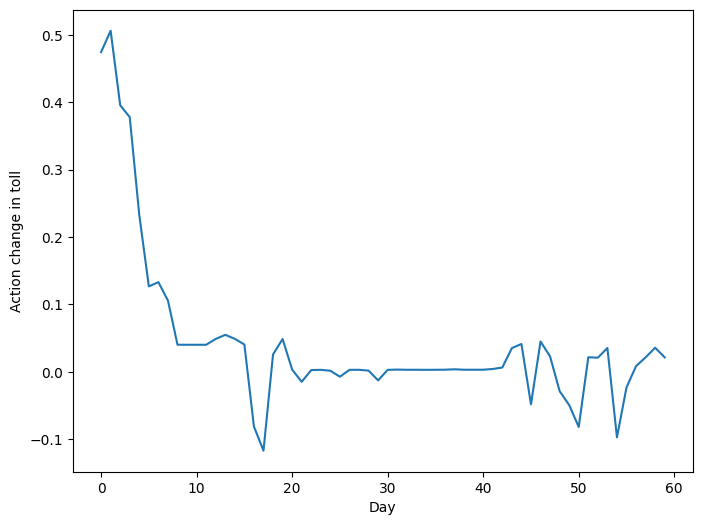

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(action_arr_0)
plt.ylabel("Action change in toll",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_action.jpeg', dpi=fig.dpi)


ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1, 61, 3)

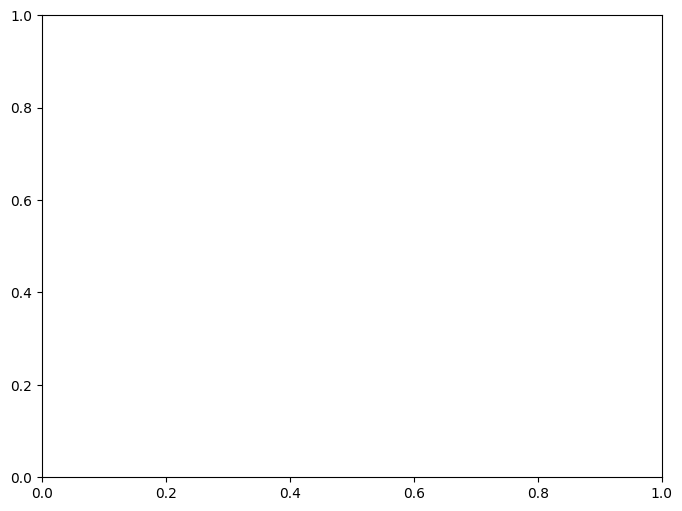

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(toll_arr_0)
plt.ylabel("Action change in toll",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_action.jpeg', dpi=fig.dpi)


In [ ]:
toll_arr_0

array([0.        , 1.66008107, 3.43126334, 4.81555623, 6.13768543,
       6.95080667, 7.        , 7.        , 7.        , 7.        ,
       7.        , 7.        , 7.        , 7.        , 7.        ,
       7.        , 7.        , 6.71576677, 6.30577882, 6.39576503,
       6.56582759, 6.57735624, 6.52521274, 6.53400835, 6.54401284,
       6.54929024, 6.52367445, 6.53361403, 6.5439292 , 6.5499318 ,
       6.505198  , 6.51522284, 6.52657048, 6.53707484, 6.54749651,
       6.55761985, 6.56800506, 6.57876345, 6.59172513, 6.60234827,
       6.61284796, 6.62359297, 6.63803783, 6.6602881 , 6.78312154,
       6.92740021, 6.75835399, 6.91572966, 6.99519612, 6.89450964,
       6.72154996, 6.43497965, 6.51032872, 6.58352698, 6.70693295,
       6.36630151, 6.28513501, 6.31457721, 6.38960737, 6.51460632,
       6.58929591])

In [ ]:
toll_arr_0

array([0.        , 1.66008107, 3.43126334, 4.81555623, 6.13768543,
       6.95080667, 7.        , 7.        , 7.        , 7.        ,
       7.        , 7.        , 7.        , 7.        , 7.        ,
       7.        , 7.        , 6.71576677, 6.30577882, 6.39576503,
       6.56582759, 6.57735624, 6.52521274, 6.53400835, 6.54401284,
       6.54929024, 6.52367445, 6.53361403, 6.5439292 , 6.5499318 ,
       6.505198  , 6.51522284, 6.52657048, 6.53707484, 6.54749651,
       6.55761985, 6.56800506, 6.57876345, 6.59172513, 6.60234827,
       6.61284796, 6.62359297, 6.63803783, 6.6602881 , 6.78312154,
       6.92740021, 6.75835399, 6.91572966, 6.99519612, 6.89450964,
       6.72154996, 6.43497965, 6.51032872, 6.58352698, 6.70693295,
       6.36630151, 6.28513501, 6.31457721, 6.38960737, 6.51460632,
       6.58929591])

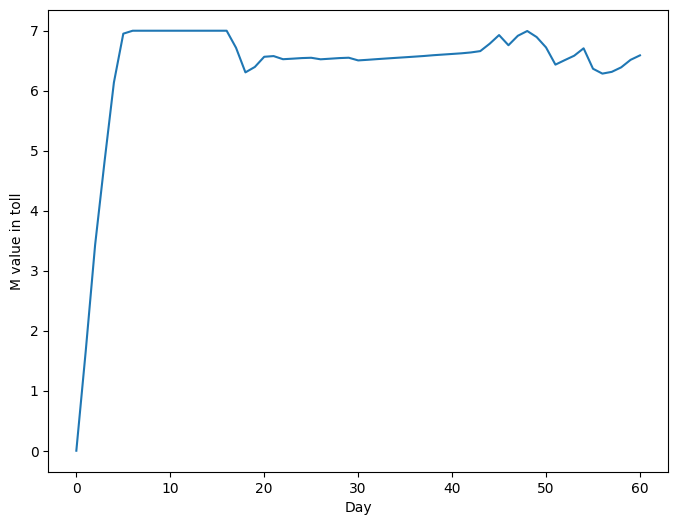

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(toll_arr_0)
plt.ylabel("M value in toll",fontsize=10)
plt.xlabel("Day",fontsize=10)
# plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
fig.savefig(plot_path+'/test_M.jpeg', dpi=fig.dpi)


In [ ]:
2578+853.8+70+7182

10683.8

In [ ]:
data = []
RL = ["RL(after 100 updates)", 
        np.round(np.mean(toll_arr_0[-5:]), 2),  
        np.round(np.mean(tt_arr_0), 2),  
        np.round(np.mean(tt_arr_0[-5:]), 2),  
        np.round(np.mean(tt_car_arr_0[-5:]), 2),  
        np.round(np.mean(sw_arr_0[-5:]/7500), 2),  
        np.round(np.mean(pt_arr_0[-5:]), 2), 
        np.round(np.mean(mp_arr_0[-5:]), 2), 
      ]
data.append(RL)

BO= ["BO", 3.22, 35.81, 35.82, 32.16, 21, 981, 1.55]
data.append(BO)

col_names = ["Algo", "A value", "AITT", "last-5-day AITT", "last-5-day car only AITT", "last-5-day SW", "last-5-day PT", "last-5-day Token Price"]

print(tabulate(data, headers=col_names))

NameError: name 'tt_car_arr_0' is not defined